### Exploratory Data Analysis of Crime in Austin

Data obtained from data.austintexas.gov\
Data contains a record of incidents that the Austin Police responded to and wrote a written report\
Dataset only depicts the highest level offense of that incident

#### Imports

In [114]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
import datetime as dt
from plotly.subplots import make_subplots

In [6]:
data_df= pd.read_csv('Data/Crime_Reports.csv', low_memory=False)

#### Exploring data

In [29]:
data_df.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2006471156,FAMILY DISTURBANCE,3400,N,02/16/2006 02:25:00 PM,02/16/2006,1425.0,02/16/2006 02:25:00 PM,02/16/2006,1425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20045044338,TAMPERING WITH ID NUMBER,2719,N,09/14/2004 03:32:00 PM,09/14/2004,1532.0,09/14/2004 03:32:00 PM,09/14/2004,1532.0,...,NaN,N,09/14/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006960811,FAMILY DISTURBANCE,3400,N,04/06/2006 10:29:00 AM,04/06/2006,1029.0,04/06/2006 10:29:00 AM,04/06/2006,1029.0,...,NaN,N,05/01/2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013851154,SEXUAL ASSAULT OF CHILD/OBJECT,1707,Y,01/01/2009 12:01:00 AM,01/01/2009,1.0,03/26/2013 04:56:00 PM,03/26/2013,1656.0,...,4.00,C,04/11/2013,11C,Rape,0.0,0.0,NaN,NaN,NaN
4,20161800084,RAPE OF A CHILD,204,Y,06/28/2016 01:05:00 AM,06/28/2016,105.0,06/28/2016 01:05:00 AM,06/28/2016,105.0,...,24.41,C,07/01/2016,11A,Rape,0.0,0.0,NaN,NaN,NaN


In [30]:
data_df.tail()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2462412,20215001631,DEBIT CARD ABUSE,1108,N,09/24/2020 12:00:00 PM,09/24/2020,1200.0,01/13/2021 10:27:00 AM,01/13/2021,1027.0,...,24.47,N,01/14/2021,NaN,NaN,3118294.0,10050405.0,30.211876,-97.731707,"(30.2118759, -97.73170695)"
2462413,20105013578,BURGLARY OF VEHICLE,601,N,03/19/2010 07:00:00 PM,03/19/2010,1900.0,03/19/2010 11:16:00 PM,03/19/2010,2316.0,...,19.11,N,03/25/2010,23F,Theft,3105575.0,10069711.0,30.265757,-97.770554,"(30.2657568, -97.77055439)"
2462414,20085066651,PROTECTIVE ORDER,3829,N,12/16/2008 03:56:00 PM,12/16/2008,1556.0,12/16/2008 03:56:00 PM,12/16/2008,1556.0,...,13.00,NaN,NaN,NaN,NaN,3105754.0,10060029.0,30.239131,-97.770694,"(30.23913102, -97.77069399)"
2462415,20101570072,VIOL CITY ORDINANCE - OTHER,3299,N,06/06/2010 12:31:00 AM,06/06/2010,31.0,06/06/2010 12:31:00 AM,06/06/2010,31.0,...,431.00,C,08/07/2010,NaN,NaN,3130528.0,10104030.0,30.358489,-97.688952,"(30.35848873, -97.68895198)"
2462416,20102371234,FORGERY AND PASSING,1000,N,08/25/2010 04:05:00 PM,08/25/2010,1605.0,08/25/2010 04:05:00 PM,08/25/2010,1605.0,...,13.00,N,08/26/2010,NaN,NaN,3107741.0,10061626.0,30.243395,-97.764287,"(30.24339493, -97.76428662)"


In [19]:
#converted the date format to make sure they were all the same
data_df['Occurred Date'] = pd.to_datetime(data_df['Occurred Date'], format='%m/%d/%Y')

In [21]:
# filtered the data to only include years 2019-2023
# not shown but I converted that to a new csv
filtered_df = data_df.loc[(data_df['Occurred Date']>= '01/01/2019') & (data_df['Occurred Date']< '01/01/2024')]

In [78]:
df= pd.read_csv('Data/crime_data_filtered.csv', low_memory=False)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468082 entries, 0 to 468081
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Incident Number              468082 non-null  int64  
 1   Highest Offense Description  468082 non-null  object 
 2   Highest Offense Code         468082 non-null  int64  
 3   Family Violence              468082 non-null  object 
 4   Occurred Date Time           468082 non-null  object 
 5   Occurred Date                468082 non-null  object 
 6   Occurred Time                468082 non-null  float64
 7   Report Date Time             468082 non-null  object 
 8   Report Date                  468082 non-null  object 
 9   Report Time                  468082 non-null  float64
 10  Location Type                467485 non-null  object 
 11  Address                      468081 non-null  object 
 12  Zip Code                     466393 non-null  float64
 13 

In [80]:
df = df.drop(columns=['Census Tract', 'Clearance Status', 'Clearance Date', 'UCR Category', 'Category Description', 'X-coordinate', 'Y-coordinate'])

In [82]:
data = df.dropna()

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458007 entries, 548 to 468081
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Incident Number              458007 non-null  int64  
 1   Highest Offense Description  458007 non-null  object 
 2   Highest Offense Code         458007 non-null  int64  
 3   Family Violence              458007 non-null  object 
 4   Occurred Date Time           458007 non-null  object 
 5   Occurred Date                458007 non-null  object 
 6   Occurred Time                458007 non-null  float64
 7   Report Date Time             458007 non-null  object 
 8   Report Date                  458007 non-null  object 
 9   Report Time                  458007 non-null  float64
 10  Location Type                458007 non-null  object 
 11  Address                      458007 non-null  object 
 12  Zip Code                     458007 non-null  float64
 13  Co

In [90]:
data['Occurred Date'] = pd.to_datetime(data['Occurred Date'], format='%Y-%m-%d')

C:\Users\lizob\AppData\Local\Temp\ipykernel_14760\1414243407.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
# Adding a new column of just the year
data= data.assign(Year=data['Occurred Date'].dt.year)

In [99]:
# Getting a list of column names so that it can be rearranged
cols=list(data.columns.values)

['Incident Number',
 'Highest Offense Description',
 'Highest Offense Code',
 'Family Violence',
 'Occurred Date Time',
 'Occurred Date',
 'Occurred Time',
 'Report Date Time',
 'Report Date',
 'Report Time',
 'Location Type',
 'Address',
 'Zip Code',
 'Council District',
 'APD Sector',
 'APD District',
 'PRA',
 'Latitude',
 'Longitude',
 'Location',
 'Year']

In [101]:
data=data[['Incident Number',
 'Highest Offense Description',
 'Highest Offense Code',
 'Family Violence',
 'Occurred Date Time',
 'Occurred Date',
 'Year',
 'Occurred Time',
 'Report Date Time',
 'Report Date',
 'Report Time',
 'Location Type',
 'Address',
 'Zip Code',
 'Council District',
 'APD Sector',
 'APD District',
 'PRA',
 'Latitude',
 'Longitude',
 'Location']]

In [52]:
def treemap (categories, title, path, values):
    fig = px.treemap(categories, path=path, values=values, height=700,
        title=title, color_discrete_sequence= px.colors.sequential.RdBu)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [50]:
def histogram (data, path, color, title, xaxis, yaxis):
    fig = px.histogram(data, x=path, color=color)
    fig.update_layout(
        title_text=title,
        xaxis_title_text=xaxis,
        yaxis_title_text=yaxis,
        bargap=0.2,
        bargroupgap=0.1
    )
    fig.show()

In [53]:
def bar(categories, x,y,color,title,xlab,ylab):
    fig = px.bar(categories, x=x, y=y, color=color, height=400)
    fig.update_layout(
        title_text=title,
        xaxis_title_text=xlab,
        yaxis_title_text=ylab,
        bargap=0.2,
        bargroupgap=0.1
    )
    fig.show()

In [56]:
number_crimes= data['Highest Offense Description'].value_counts()
values = number_crimes.values
categories= pd.DataFrame(data=number_crimes.index, columns = ['Highest Offense Description'])
categories['values']=values

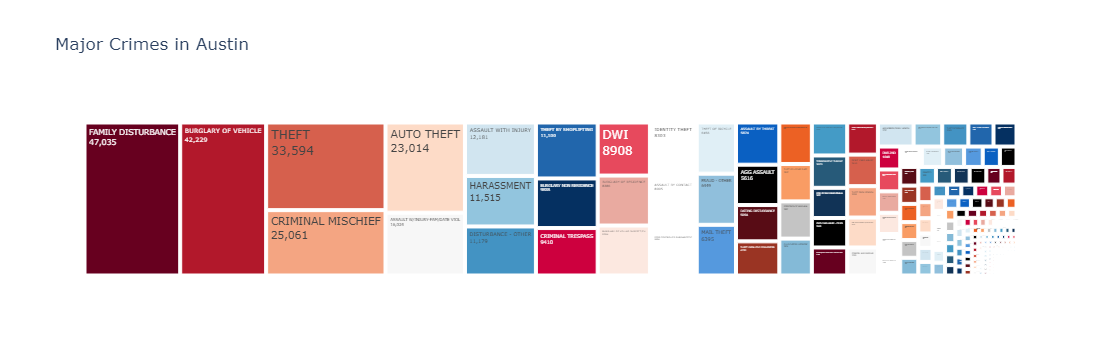

In [57]:
# Tree map showing the highest crimes in Austin from 2019-2023
treemap(categories, 'Major Crimes in Austin', ['Highest Offense Description'], categories['values'])

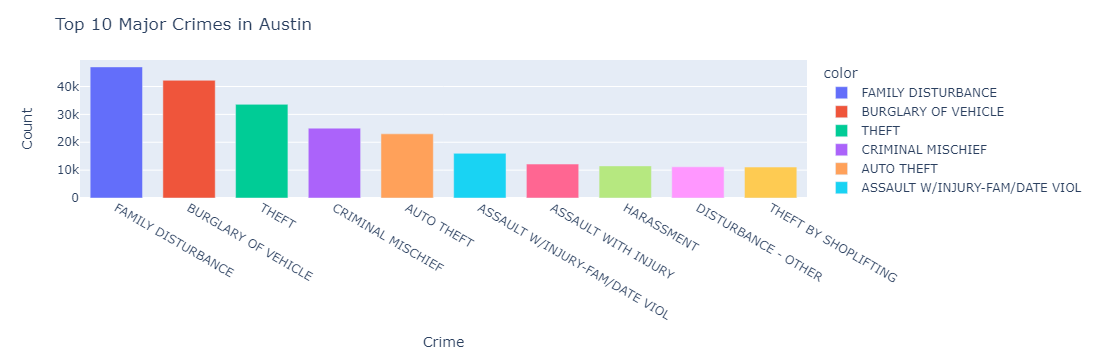

In [58]:
# Top 10 crimes in Austin
bar(categories, categories['Highest Offense Description'][0:10], categories
   ['values'][0:10], categories ['Highest Offense Description'][0:10],
   'Top 10 Major Crimes in Austin', 'Crime', 'Count')

In [106]:
number_crimes_year = data['Year'].value_counts()
years = pd.DataFrame(data= number_crimes_year.index, columns = ['Year'])
years['values'] = number_crimes_year.values

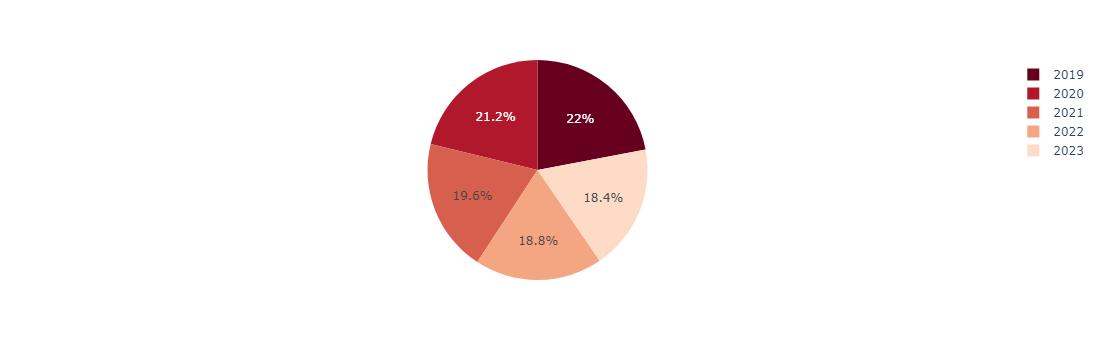

In [109]:
fig= px.pie(years, values= 'values', names= 'Year', color_discrete_sequence=
           px.colors.sequential.RdBu)
fig.show()